# Неделя 4: нейронные сети

## Классификация изображений с помощью предобученных сверточных сетей

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive

In [2]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annapuzynina","key":"a759077a9ea0528a1edb35b802abd325"}'}

In [5]:
!rm -rf /root/.kaggle/
!mkdir /root/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d carlosrunner/pizza-not-pizza

 96% 97.0M/101M [00:02<00:00, 40.1MB/s]
100% 101M/101M [00:02<00:00, 43.0MB/s] 


In [9]:
!ls

gdrive	kaggle.json  pizza-not-pizza.zip  sample_data


In [ ]:
!unzip pizza-not-pizza.zip

In [14]:
!ls pizza_not_pizza

food101_subset.py  not_pizza  pizza


In [17]:
!cd pizza_not_pizza

In [18]:
!ls

gdrive	kaggle.json  pizza_not_pizza  pizza-not-pizza.zip  sample_data


In [19]:
!pwd

/content


In [15]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
from torchsummary import summary
import json
import numpy as np
import matplotlib.pyplot as plt

In [22]:
!ls

gdrive	kaggle.json  pizza_not_pizza  pizza-not-pizza.zip  sample_data


In [25]:
!mkdir /pizza_not_pizza train

In [29]:
!mkdir pizza_not_pizza/train

In [30]:
!ls pizza_not_pizza

food101_subset.py  not_pizza  pizza  train


In [31]:
!mv pizza_not_pizza/not_pizza pizza_not_pizza/train

In [32]:
!ls pizza_not_pizza

food101_subset.py  pizza  train


In [33]:
!mv pizza_not_pizza/pizza pizza_not_pizza/train

In [34]:
!ls pizza_not_pizza/train

not_pizza  pizza


2. Убедитесь, что структура папок соответствует задаче классификации (либо приведите ее к формату, указанному ниже): 

        `train`
        
            - class_1
            - class_2
            - ...
            - class_n
            
        `valid`

            - class_1
            - class_2
            - ...
            - class_n

1. Создайте `DataLoader` в для обучающей и валидационных выборок. Примените аугментации к изображениям. 

In [35]:
transfrm = T.Compose([T.Resize((224, 224)), T.ToTensor()])

In [36]:
train_dataset = datasets.ImageFolder('pizza_not_pizza/train', transform=transfrm)
# valid_dataset = datasets.ImageFolder('cats_and_dogs_filtered/validation', transform=transfrm)

In [37]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=32)
# valid_loader = DataLoader(valid_dataset, shuffle=True, batch_size=32)

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


4. Создайте экземпляр предобученной модели: [torchvision models](https://pytorch.org/vision/stable/models.html)

In [39]:
model = torch.hub.load("pytorch/vision:v0.10.0", "resnet18", pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

5. Дополните модель выходым слоем формата, который подходит под задачу: бинарная или многоклассовая классификация. 

In [40]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# model.classifier[3] = nn.Linear(1024, 1)

In [42]:
model.fc = nn.Linear(512, 1)

In [43]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

6. Обучите модель (только последний слой!) и зафиксируйте метрику на валидационной части выборки. 

In [44]:
for param in model.parameters():
    param.requires_grad = False

model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [46]:
summary(model, (3, 224, 224), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 112, 112]           9,408
       BatchNorm2d-2         [32, 64, 112, 112]             128
              ReLU-3         [32, 64, 112, 112]               0
         MaxPool2d-4           [32, 64, 56, 56]               0
            Conv2d-5           [32, 64, 56, 56]          36,864
       BatchNorm2d-6           [32, 64, 56, 56]             128
              ReLU-7           [32, 64, 56, 56]               0
            Conv2d-8           [32, 64, 56, 56]          36,864
       BatchNorm2d-9           [32, 64, 56, 56]             128
             ReLU-10           [32, 64, 56, 56]               0
       BasicBlock-11           [32, 64, 56, 56]               0
           Conv2d-12           [32, 64, 56, 56]          36,864
      BatchNorm2d-13           [32, 64, 56, 56]             128
             ReLU-14           [32, 64,

In [47]:
def compute_batch_accuracy(preds, labels):
    preds_reshaped = preds.squeeze(-1)
    # print(preds_reshaped)
    preds_sigmoid  = preds_reshaped.sigmoid()
    # print(preds_sigmoid)
    preds_classes  = torch.round(preds_sigmoid)
    # print(preds_classes)
    bool_array     = preds_classes == labels
    # print(bool_array)
    number_of_true = bool_array.sum()
    # print(number_of_true)
    accuracy       = number_of_true / len(labels)
    # print(accuracy)
    accuracy_float = accuracy.item()

    return accuracy_float

In [48]:
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.BCEWithLogitsLoss()

In [49]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [50]:
model.to(device)

train_epoch_acc = []
train_epoch_losses = []
# valid_epoch_losses = []
# valid_epoch_acc =[]
for epoch in range(30):
    model.train()
    loss_batch = []
    acc_batch  = []



    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)
        
        loss = criterion(preds.squeeze(-1), labels.float())

        loss_batch.append(loss.item())
        acc_batch.append(compute_batch_accuracy(preds, labels))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_epoch_losses.append(np.mean(loss_batch))
    train_epoch_acc.append(np.mean(acc_batch))
    
    # model.eval()
    # loss_batch = []
    # acc_batch  = []
    # for images, labels in valid_loader:
    #     images = images.to(device)
    #     labels = labels.to(device)
    #     preds = model(images)

    #     loss_batch.append(loss.item())
    #     acc_batch.append(compute_batch_accuracy(preds, labels))

        
    # valid_epoch_losses.append(np.mean(loss_batch))
    # valid_epoch_acc.append(np.mean(acc_batch))
    print(f'[Epoch {epoch:02d}] Train loss: {train_epoch_losses[-1]:.4f}, Train acc {train_epoch_acc[-1]:.4f}')
    
# fig, ax = plt.subplots(1, 2, figsize=(20, 4))
# ax[0].plot(train_epoch_losses)
# # ax[0].plot(valid_epoch_losses)
# # ax[0].set_ylim((0, np.max(train_epoch_losses.extend(valid_epoch_losses))))
# # ax[0].set_title('Valid loss history')

# ax[1].plot(train_epoch_acc)
# ax[1].plot(valid_epoch_acc)
# ax[1].set_ylim(0, 1.1)
# ax[1].set_title('Acc history');

[Epoch 00] Train loss: 0.5338, Train acc 0.7495
[Epoch 01] Train loss: 0.3256, Train acc 0.8952
[Epoch 02] Train loss: 0.2777, Train acc 0.9048
[Epoch 03] Train loss: 0.2510, Train acc 0.9021
[Epoch 04] Train loss: 0.2350, Train acc 0.9153
[Epoch 05] Train loss: 0.2212, Train acc 0.9194
[Epoch 06] Train loss: 0.2082, Train acc 0.9284
[Epoch 07] Train loss: 0.2023, Train acc 0.9276
[Epoch 08] Train loss: 0.1973, Train acc 0.9305
[Epoch 09] Train loss: 0.1875, Train acc 0.9342
[Epoch 10] Train loss: 0.1855, Train acc 0.9357
[Epoch 11] Train loss: 0.1853, Train acc 0.9325
[Epoch 12] Train loss: 0.1882, Train acc 0.9254
[Epoch 13] Train loss: 0.1825, Train acc 0.9315
[Epoch 14] Train loss: 0.1816, Train acc 0.9302
[Epoch 15] Train loss: 0.1740, Train acc 0.9380
[Epoch 16] Train loss: 0.1567, Train acc 0.9516
[Epoch 17] Train loss: 0.1735, Train acc 0.9358
[Epoch 18] Train loss: 0.1689, Train acc 0.9414
[Epoch 19] Train loss: 0.1710, Train acc 0.9389
[Epoch 20] Train loss: 0.1614, Train acc

In [51]:
!wget -O image.jpg https://eda.ru/img/eda/c620x415/s1.eda.ru/StaticContent/Photos/120131085053/171027192707/p_O.jpg

--2022-10-20 07:24:32--  https://eda.ru/img/eda/c620x415/s1.eda.ru/StaticContent/Photos/120131085053/171027192707/p_O.jpg
Resolving eda.ru (eda.ru)... 81.19.92.116
Connecting to eda.ru (eda.ru)|81.19.92.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121994 (119K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 119.13K  --.-KB/s    in 0.08s   

2022-10-20 07:24:32 (1.42 MB/s) - ‘image.jpg’ saved [121994/121994]



In [61]:
!wget -O image1.jpg https://www.gastronom.ru/binfiles/images/20161024/b5c63d06.jpg

--2022-10-20 07:28:49--  https://www.gastronom.ru/binfiles/images/20161024/b5c63d06.jpg
Resolving www.gastronom.ru (www.gastronom.ru)... 178.248.238.173
Connecting to www.gastronom.ru (www.gastronom.ru)|178.248.238.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67101 (66K) [image/jpeg]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>]  65.53K  --.-KB/s    in 0.04s   

2022-10-20 07:28:49 (1.56 MB/s) - ‘image1.jpg’ saved [67101/67101]



In [52]:
resize = T.Resize((224, 224))

In [53]:
img = resize(io.read_image('image.jpg')/255)

In [ ]:
img

tensor([[[0.2602, 0.2507, 0.2531,  ..., 0.3353, 0.3170, 0.3109],
         [0.2480, 0.2387, 0.2375,  ..., 0.3315, 0.3187, 0.3138],
         [0.2449, 0.2380, 0.2346,  ..., 0.3359, 0.3289, 0.3279],
         ...,
         [0.7773, 0.6999, 0.6666,  ..., 0.6359, 0.6489, 0.7218],
         [0.7411, 0.6922, 0.6742,  ..., 0.6169, 0.6369, 0.6664],
         [0.7104, 0.6754, 0.7060,  ..., 0.6509, 0.6644, 0.6722]],

        [[0.2484, 0.2390, 0.2414,  ..., 0.3627, 0.3398, 0.3266],
         [0.2362, 0.2270, 0.2276,  ..., 0.3608, 0.3450, 0.3329],
         [0.2331, 0.2262, 0.2276,  ..., 0.3706, 0.3564, 0.3543],
         ...,
         [0.8002, 0.7420, 0.7295,  ..., 0.6922, 0.7209, 0.7749],
         [0.7616, 0.7277, 0.7298,  ..., 0.6766, 0.7090, 0.7178],
         [0.7294, 0.7037, 0.7548,  ..., 0.7112, 0.7330, 0.7216]],

        [[0.2131, 0.2037, 0.2061,  ..., 0.2358, 0.2305, 0.2335],
         [0.2009, 0.1917, 0.1917,  ..., 0.2271, 0.2233, 0.2292],
         [0.1978, 0.1909, 0.1907,  ..., 0.2251, 0.2254, 0.

In [62]:
img1 = resize(io.read_image('image1.jpg')/255)

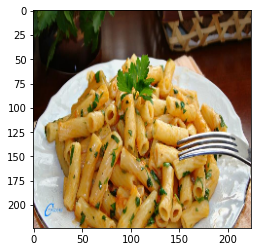

In [63]:
plt.imshow(torch.permute(img1, (1, 2, 0)))

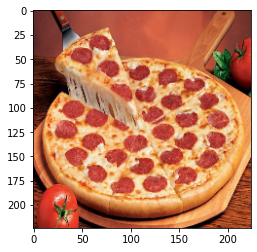

In [54]:
plt.imshow(torch.permute(img, (1, 2, 0)))

In [ ]:
model(img.to(device).unsqueeze(0)).sigmoid().item()

0.9962433576583862

In [57]:
!ls pizza_not_pizza/train

not_pizza  pizza


In [58]:
dictionar_class = {
    0: 'Не пицца',
    1: 'Пицца'
    }

In [ ]:
dictionar_class[0]

'Cat'

In [59]:
decode = lambda x: dictionar_class[int(x)] 

Text(0.5, 1.0, 'Не пицца')

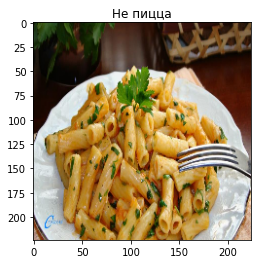

In [64]:
model.to(device)
model.eval()
plt.imshow(torch.permute(img1, (1, 2, 0)))
plt.title(decode(torch.round(model(img1.to(device).unsqueeze(0)).sigmoid()).item()))

Text(0.5, 1.0, 'Пицца')

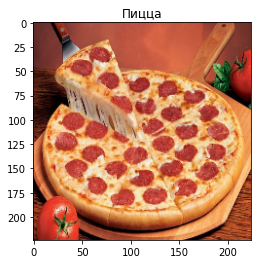

In [60]:
model.to(device)
model.eval()
plt.imshow(torch.permute(img, (1, 2, 0)))
plt.title(decode(torch.round(model(img.to(device).unsqueeze(0)).sigmoid()).item()))

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


7. Распечатайте изображение из тестовой выборки и подпишите класс картинки, предсказанный моделью. 

8. "Разморозьте" несоклько слоев базовой модели и вновь обучите ее. Зафиксируйте метрику качества для модели. О том, как сделать unfreeze нескольких слоев сразу, а не только последнего, можно почитать тут: [discuss.pytorch.org](https://discuss.pytorch.org/t/how-the-pytorch-freeze-network-in-some-layers-only-the-rest-of-the-training/7088/3)

In [ ]:
# code

9. Сравни качество двух моделей: предобученной с замененным выходным слоем и дообученной с несколькими размороженными слоями. 

In [ ]:
# code

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__ и распечатай результат команды `!git status` в ячейке ниже. 

In [ ]:
# code

10. Сохрани модель (пример можно посмотреть [тут](../../learning/aux/model_saving.ipynb) или в [документации](https://pytorch.org/tutorials/beginner/saving_loading_models.html))

In [65]:
torch.save(model.state_dict(), 'model_pizza.pt')

In [66]:
!ls

gdrive	    image.jpg	 model_pizza.pt   pizza-not-pizza.zip  train
image1.jpg  kaggle.json  pizza_not_pizza  sample_data


11. Реализуй функцию, которая на вход принимает путь к файлу, а в ответ возвращает класс объекта. 

In [ ]:
def get_prediction(path: str) -> str:
    pass

12. Реализуй telegram-бот, которому пользователь присылает картинку, а бот возвращает пользователю класс объекта, котороый изображен на картинке. 